**DATA VALIDATION**

The datasets contains 15,000 rows and 8 columns before validation and cleaning .I validated all the columns against the criteria in the datasets table

Columns

Week: Week sale was made, counted as weeks since product launch. No cleaning required and contains 0 missing values.

sales_method: Character, which of the three sales methods were used for that customer. The sales_method column contains 0 missing values but had misspelled category and different case(thereby creating repetition) ,i converted everything to title case and converted "Em + Call" to " Email + call",then converted "Email + Call" to "Email + call" resulting to Email, Call, Email + call

customer_id: Character, unique identifier for the customer. No cleaning required and contains 0 missing values.

revenue: Numeric, revenue from the sales, rounded to 2 decimal places(i also rounded the column to 2 decimal places to be sure).This column contains 1074 missing values. I replaced the missing values with 0.

nb_sold: Numeric, number of new products sold.No cleaning required and contains 0 missing values.

years_as_customer: Numeric, number of years customer has been buying from us (company founded in 1984).No cleaning required and contains 0 missing values.

nb_site_visits: Numeric, number of times the customer has visited our website in the last 6 months.No cleaning required and contains 0 missing values.

state: Character, location of the customer i.e. where orders are shipped.No cleaning required and contains 0 missing values.

After validation the datasets contains 15,000 rows and 8 columns without missing values.

In [31]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#importing the datasets
product_db = pd.read_csv('product_sales.csv')

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#replacing missing values in the revenue column with 0
product_db['revenue'].fillna(0, inplace=True)

#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + call'})
product_db["sales_method"] = product_db["sales_method"].replace({'Email + Call':'Email + call'})

approach = product_db.groupby("sales_method")["revenue"].sum()
variance_revenue = np.var(product_db["revenue"])
variance_product_sold = np.var(product_db["nb_sold"])
variance_of_nb_site_visits = np.var(product_db["nb_site_visits"])
#product_db = product_db.sort_values(by='revenue', ascending=False)
product_db = product_db.sort_values(by='revenue', ascending=True)

total = product_db.groupby("sales_method")["revenue"].sum()
#print(total)
#print(product_db[["nb_site_visits",'sales_method', "nb_sold", "revenue"]].head(50))
#print(product_db[['years_as_customer'] <= 1].count(50))

#print(product_db["sales_method"].unique())


#print(product_db.groupby('sales_method').count())



**ASSESSING THE EFFECTIVENESS OF OUR SALES METHODS**

Over the last six weeks, EMAIL was the preferred method for buying stationaries from us. According to the plot, the Email method attracted over 2000 extra customers (over 7000 in total) compared to the second best method, which was Call with nearly 5000 customers. Email + Call had the fewest customers (above 2000).

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


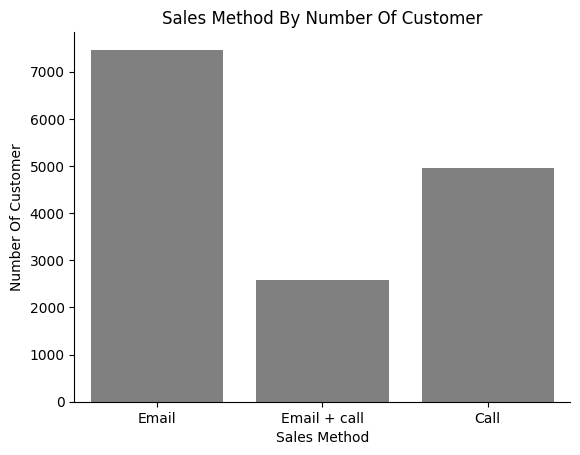

In [32]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the datasets
product_db = pd.read_csv('product_sales.csv')

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#replacing missing values in the revenue column with 0
product_db['revenue'].fillna(0, inplace=True)

#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + call'})
product_db["sales_method"] = product_db["sales_method"].replace({'Email + Call':'Email + call'})

#sales method per no_sold
# Create a countplot to calculate every category in a column
ax = sns.countplot(data=product_db, x='sales_method', color='grey')


# Set the title, x-label and y-label of the plot
ax.set_title('Sales Method By Number Of Customer')
ax.set_xlabel('Sales Method')
ax.set_ylabel('Number Of Customer')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


In terms of revenue generated in the same period (last 6 weeks), Email also performed better than the other sales methods used, generating over 650,000 in total. The second sales method in terms of total revenue was Email + call, which generated approximately 400,000, considering it had the lowest number of customers. The least in terms of revenue was Call, sitting slightly above 200,000.

Note: the total revenue generated was $1,308,138.01.

C:\Users\HP\AppData\Local\Temp\ipykernel_804\1629620263.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${}'.format(int(y)) for y in ax.get_yticks()])


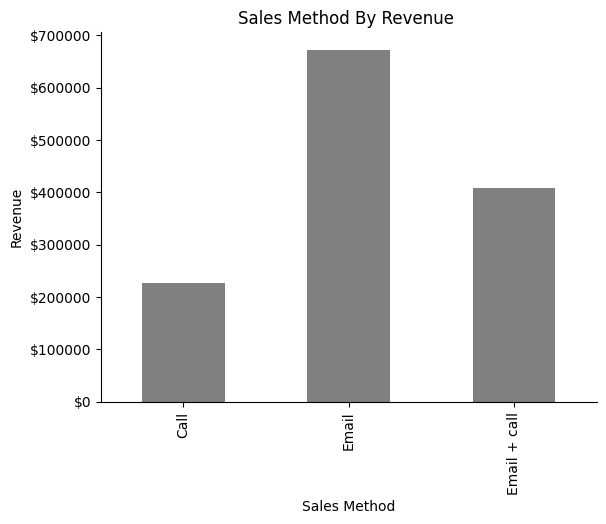

In [33]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the datasets
product_db = pd.read_csv('product_sales.csv')

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#replacing missing values in the revenue column with 0
product_db['revenue'].fillna(0, inplace=True)


#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + call'})
product_db["sales_method"] = product_db["sales_method"].replace({'Email + Call':'Email + call'})

#total = product_db['revenue'].sum()
#print(total)

# Sales method per revenue
ax = product_db.groupby('sales_method')['revenue'].sum().plot(kind='bar', color='grey')
plt.title('Sales Method By Revenue ')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')

# Formatting x-axis to show dollar sign
ax.set_yticklabels(['${}'.format(int(y)) for y in ax.get_yticks()])

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

For the the amount of products sold, Email had the highest which is no surprise because
they had the highest amount of customers and generated more revenue.

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


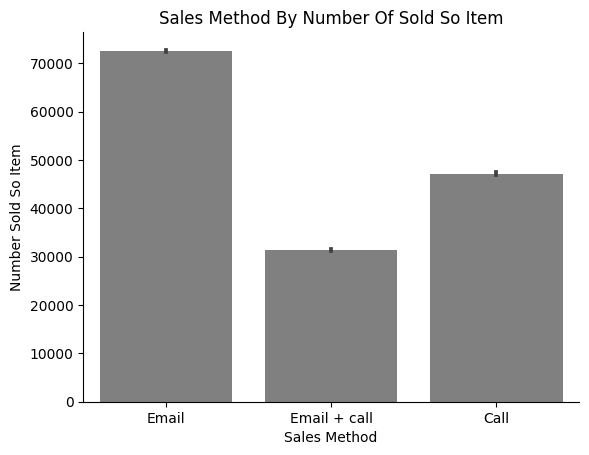

In [34]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the datasets
product_db = pd.read_csv('product_sales.csv')

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#replacing missing values in the revenue column with 0
product_db['revenue'].fillna(0, inplace=True)

#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + call'})
product_db["sales_method"] = product_db["sales_method"].replace({'Email + Call':'Email + call'})

#sales method per no_sold
sns.barplot(data=product_db, x="sales_method", y='nb_sold', estimator=sum, color='grey')
plt.title('Sales Method By Number Of Sold So Item')
plt.xlabel('Sales Method')
plt.ylabel('Number Sold So Item')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

When we take a look at the plot below ,the customers in the **Email** category visited the site the most in the last 6 months in total above 175000 times,followed by **Call** (less than 125,000) and the least in terms of visit is **Email + Call** below 75,0000

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


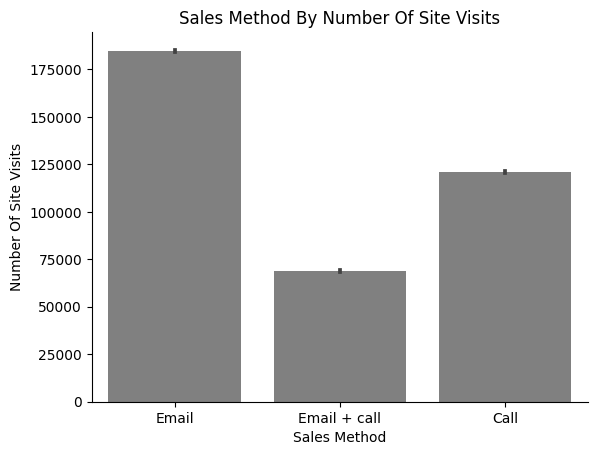

In [35]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the datasets
product_db = pd.read_csv('product_sales.csv')

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#replacing missing values in the revenue column with 0
product_db['revenue'].fillna(0, inplace=True)

#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + call'})
product_db["sales_method"] = product_db["sales_method"].replace({'Email + Call':'Email + call'})


#sales_method per number of visits
sns.barplot(data=product_db, x="sales_method", y='nb_site_visits', estimator=sum, color='grey')
plt.title('Sales Method By Number Of Site Visits')
plt.xlabel('Sales Method')
plt.ylabel('Number Of Site Visits')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

From the plot below showing the distribution of revenue across 6 weeks since product launch, the first week generated over  250,000,
which dropped below $200,000 in the third week and rose back up to approximately 250,000. It  then dropped  again, getting closer  to 150,000.



C:\Users\HP\AppData\Local\Temp\ipykernel_804\3527840334.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${}'.format(int(y)) for y in ax.get_yticks()])


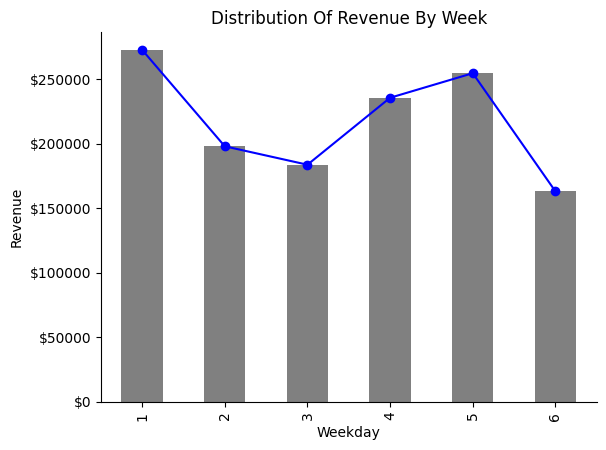

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing the datasets
product_db = pd.read_csv('product_sales.csv')

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#replacing missing values in the revenue column with 0
product_db['revenue'].fillna(0, inplace=True)

#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + call'})
product_db["sales_method"] = product_db["sales_method"].replace({'Email + Call':'Email + call'})

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#drop missing values
product_db.dropna()

#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + Call'})


# Distribution of revenue per week
ax = product_db.groupby('week')['revenue'].sum().plot(kind='bar', color='grey')
plt.title('Distribution Of Revenue By Week')
plt.xlabel('Weekday')
plt.ylabel('Revenue')

# Formatting x-axis to show dollar sign
ax.set_yticklabels(['${}'.format(int(y)) for y in ax.get_yticks()])

# Adding a line plot connecting the tops of the bars
ax.plot(ax.get_xticks(), product_db.groupby('week')['revenue'].sum(), marker='o', color='blue')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Revenue distribution across different sales methods used takes on a different look from what is shown in this plot. Starting from Call (sales method) on the left side of the plot, we can see a small but steady increase in revenue growth (starting at about 25,000 and doubling to over 50,000 in the 5th week), which then fell back to about 25,000 in the 6th week. Secondly, looking at Email (sales method) in the middle of the plot, it began strongly with around 225,000 in revenue generated during its first week but dropped to less than 25,000 by its 6th week. Lastly on the right side of this plot is Email + calls, which started with low revenue (less than 25,000) but steadily grew over time and ended up generating over 100,000 by its 6th week.

NameError: name 'MultipleLocator' is not defined

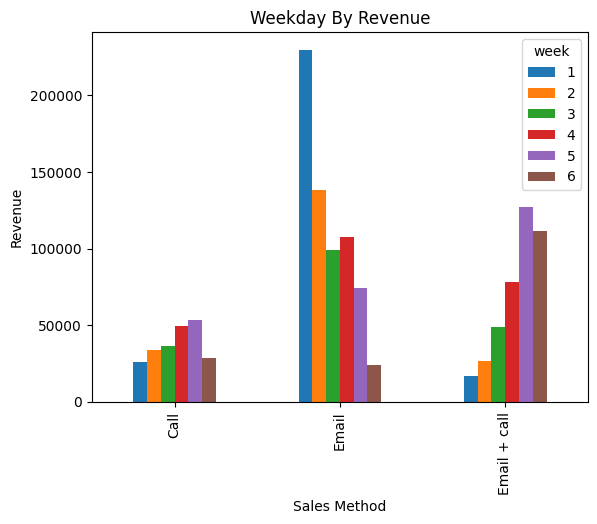

In [37]:
#importing the datasets
product_db = pd.read_csv('product_sales.csv')

#converting the revenue column to 2 decimal place
product_db["revenue"] = product_db["revenue"].round(2)

#replacing missing values in the revenue column with 0
product_db['revenue'].fillna(0, inplace=True)

#cleaning the sale_method column
product_db["sales_method"] = product_db["sales_method"].str.title()
product_db["sales_method"] = product_db["sales_method"].replace({'Em + Call':'Email + call'})
product_db["sales_method"] = product_db["sales_method"].replace({'Email + Call':'Email + call'})

# Grouped bar plot of revenue by sales method and week
ax = product_db.groupby(['sales_method', 'week'])['revenue'].sum().unstack().plot(kind='bar')
plt.title('Weekday By Revenue')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')

# Adjusting y-axis to show intervals of 25,000
y_major_locator = MultipleLocator(25000)
ax.yaxis.set_major_locator(y_major_locator)

# Formatting y-axis labels to show dollar sign and thousands separator
ax.set_yticklabels(['${:,.0f}'.format(y) for y in ax.get_yticks()])

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**RECOMMENDATION**

Based on the past week's data, the **Email** sales method outperformed others. However, the **Email + Call** method, while having fewer customers, ranked second in generating revenues and showcased promising potential. The top 50 revenue-generating customers and those who visited the site most frequently were primarily from the Email + Call group. Therefore, i recommend adopting the **Email + Call** approach as our primary sales method, pending further data analysis.

**Additional Recommendations:**

1. **Continual Monitoring:** Maintain a vigilant approach to monitor the performance of each sales method, allowing for adjustments as needed to optimize results.

2. **Data Collection:** Gather more comprehensive customer data within each group to gain deeper insights into why the Email + Call method was more successful. This could include demographics, interests, and purchase behavior etc. 

3. **Diversify Sales Methods:** Explore the possibility of experimenting with alternative sales methods, such as social media marketing or in-person events, to diversify our approach and potentially tap into untapped customer segments.

Incorporating these recommendations will help us leverage the Email + Call method's success and ensure a well-rounded sales strategy for continued growth.